In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#testing

In [91]:
x = np.array([10, 19, 30, 35, 51])
y = np.array([1, 7, 20, 50, 79])

ppop,pcov = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y, p0=(4, 0.1))


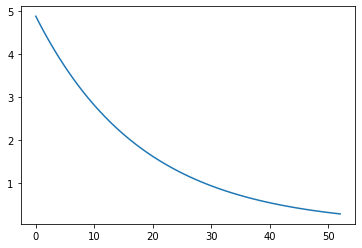

In [92]:
#plt.plot(x,y,'.')

t = np.linspace(0, 52, num=100)
Y = (ppop[0])*(np.exp(-(ppop[1])*t))

plt.plot(t,Y)

In [54]:
from pandas import Series
from lmfit import Model, Parameter, report_fit


In [ ]:
#Push Off

In [55]:

df =pd.read_csv('pushoff3.csv')

/var/folders/74/gkj91qxs1gx4r7g_2t5_50kh0000gn/T/ipykernel_33004/1349277706.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('pushoff3.csv')


In [249]:
D = []
T = []
count = 0

for i in df.iloc[:,1]:
    count = count+1
    if type(i)==type(280.1234):
        D.append(i)
    elif i!='∞' and type(i)==type('280.1234'):
        D.append(float(i))
    elif i=='∞':
        D.append(500)
        


        
for j in df.iloc[:,0]:
    T.append(j)

In [126]:
print(D[274270])

318.2825


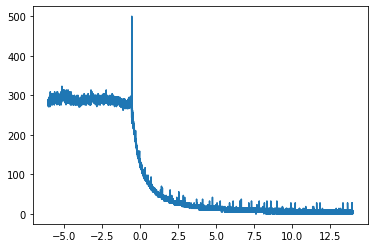

In [201]:
plt.plot(T,D)


In [160]:
def decay(t, N, tau):
    return N*(np.exp(-t/tau))

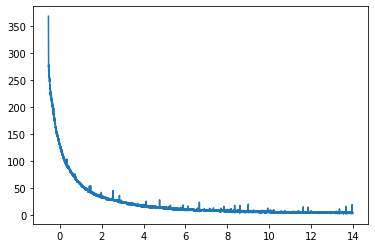

In [280]:
from scipy.signal import savgol_filter
w = savgol_filter(D[274270:], 101, 2)
plt.plot(T[274270:], w)

In [281]:
model = Model(decay, independent_vars=['t'])
result = model.fit(D[274270:], t=T[274270:], N=300, tau=10)

In [282]:
print(result.values)

{'N': 142.96414332327905, 'tau': 1.2352412941294582}


Text(0.5, 0, 'Time (s)')

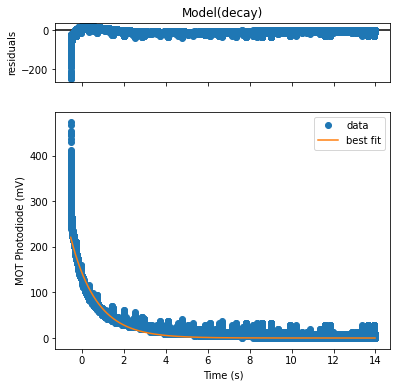

In [183]:
result.plot()
plt.ylabel('MOT Photodiode (mV)')
plt.xlabel('Time (s)')

Text(0.5, 1.0, '3D MOT Lifetime with Push Switch Off')

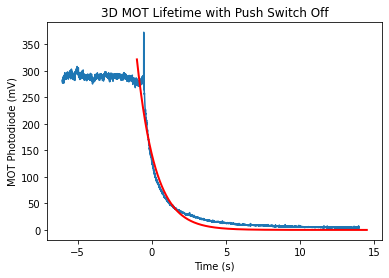

In [295]:
#plt.plot(T,D)

from scipy.signal import savgol_filter
w = savgol_filter(D[:], 501, 2)
plt.plot(T[:], w)



t = np.linspace(-1,14.5,1000)
plt.plot(t,decay(t,142.96313665731796,1.2352638435999121),'r',linewidth = 2 )
plt.ylabel('MOT Photodiode (mV)')
plt.xlabel('Time (s)')
plt.title('3D MOT Lifetime with Push Switch Off')

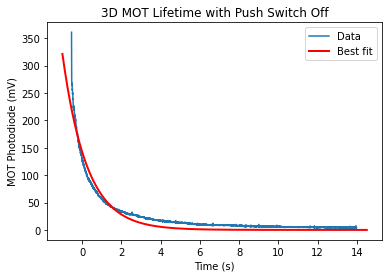

In [308]:
#plt.plot(T[274270:],D[274270:])
from scipy.signal import savgol_filter
w = savgol_filter(D[274270:], 501, 2)
plt.plot(T[274270:], w, label = 'Data')



t = np.linspace(-1,14.5,1000)
plt.plot(t,decay(t,142.96313665731796,1.2352638435999121),'r',linewidth = 2,label = 'Best fit' )
plt.ylabel('MOT Photodiode (mV)')
plt.xlabel('Time (s)')
plt.title('3D MOT Lifetime with Push Switch Off')
plt.legend()
plt.savefig('PushOffLifetimeFit')

In [ ]:
#2D MOT Switch off

In [184]:
df2doff =pd.read_csv('2doff3.csv')

/var/folders/74/gkj91qxs1gx4r7g_2t5_50kh0000gn/T/ipykernel_33004/1842198392.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2doff =pd.read_csv('2doff3.csv')


In [250]:
D2 = []
T2 = []
count = 0

for i in df2doff.iloc[:,1]:
    count = count+1
    if type(i)==type(280.1234):
        D2.append(i)
    elif i!='∞' and type(i)==type('280.1234'):
        D2.append(float(i))
    elif i=='∞':
        D2.append(500)
        #print(count)
    #else:
      #  print('y')

        
for j in df2doff.iloc[:,0]:
    T2.append(j)

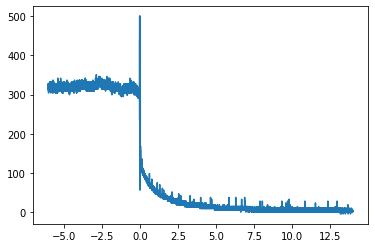

In [193]:
plt.plot(T2,D2)

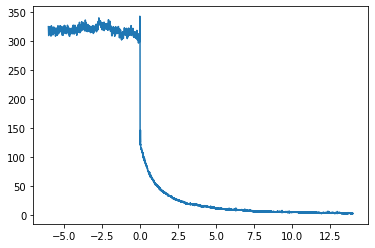

In [272]:
from scipy.signal import savgol_filter
w = savgol_filter(D2[:], 501, 2)
plt.plot(T2[:], w)

In [270]:
model = Model(decay, independent_vars=['t'])
result = model.fit(D2[301100:], t=T2[301100:], N=300, tau=10)

In [268]:
print(result.values)

{'N': 103.84483695007181, 'tau': 1.9066913304259459}


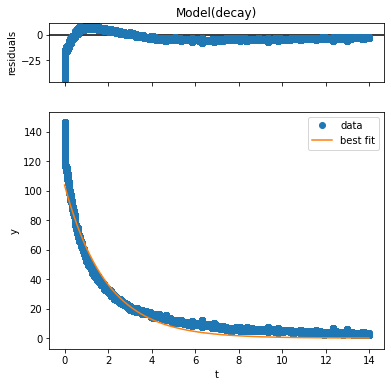

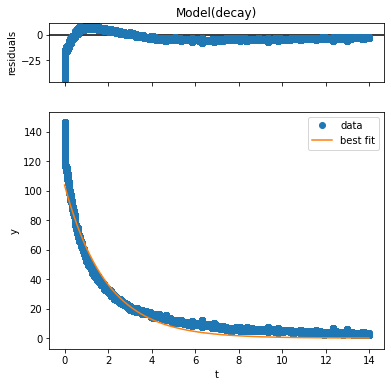

In [269]:
result.plot()

In [ ]:
#Push Off end

In [ ]:
#2D MOT Switch off

Text(0.5, 1.0, '3D MOT Lifetime with 2D MOT Switch Off')

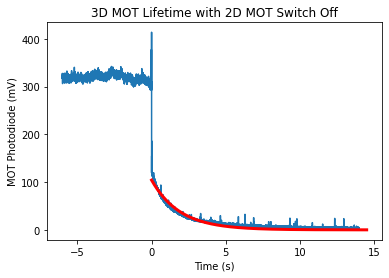

In [292]:

from scipy.signal import savgol_filter
w = savgol_filter(D2[:], 51, 2)
plt.plot(T2[:], w)

t = np.linspace(0,14.5,1000)
plt.plot(t,decay(t,104.14844328547443,1.9000075379237789),'r',linewidth = 3 )
plt.ylabel('MOT Photodiode (mV)')
plt.xlabel('Time (s)')
plt.title('3D MOT Lifetime with 2D MOT Switch Off')

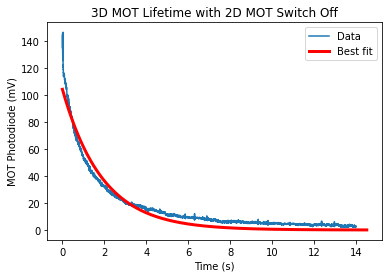

In [309]:
#plt.plot(T2[301100:],D2[301100:])

from scipy.signal import savgol_filter
w = savgol_filter(D2[301100:], 501, 2)
plt.plot(T2[301100:], w,label = 'Data')

t = np.linspace(0,14.5,1000)
plt.plot(t,decay(t,104.14844328547443,1.9000075379237789),'r',linewidth = 3,label = 'Best fit' )
plt.ylabel('MOT Photodiode (mV)')
plt.xlabel('Time (s)')
plt.title('3D MOT Lifetime with 2D MOT Switch Off')
plt.legend()
plt.savefig('2DOffLifetimeFit')

In [ ]:
#Magnetic Trap

In [2]:
def decay(t, N, tau):
    return N*(np.exp(-t/tau))

In [3]:
holdtime = [1,2,5,10,15,20,25,30,35,40,50,60,70]
fluor = [30,22,25,18,18,12,10,8,7,7,5,2,1]

In [5]:
## On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:

import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


In [6]:
tau = 25.44121183963628

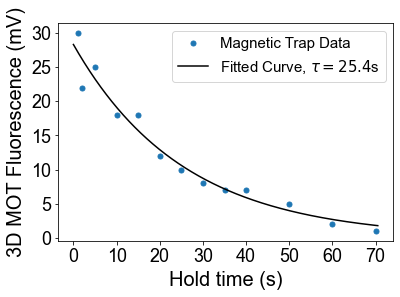

In [18]:
plt.plot(holdtime,fluor,'.',markersize=10,label = 'Magnetic Trap Data')
t = np.linspace(0,70.5,1000)
plt.plot(t,decay(t,28.349860484269342,25.44121183963628),'k', label=r'Fitted Curve, $\tau = %.1f$s' %tau)
plt.ylabel('3D MOT Fluorescence (mV)')
plt.xlabel('Hold time (s)')
plt.xticks([0,10,20,30,40,50,60,70])
plt.yticks([0,5,10,15,20,25,30])
# plt.title('Magnetic Trap Lifetime')
plt.legend()
# plt.savefig('MagneticTrapLifetimeFit')

plt.savefig('3DMOT_MagTrapLifetime.png', dpi=300, bbox_inches='tight')
plt.savefig('3DMOT_MagTrapLifetime.pdf', dpi=300, bbox_inches='tight')

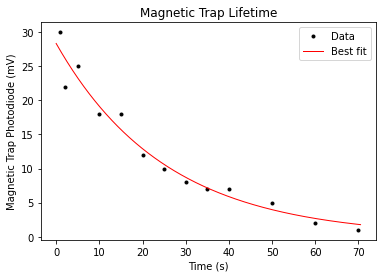

In [310]:
plt.plot(holdtime,fluor,'k.',label = 'Data')
t = np.linspace(0,70.5,1000)
plt.plot(t,decay(t,28.349860484269342,25.44121183963628),'r',linewidth = 1, label = 'Best fit' )
plt.ylabel('Magnetic Trap Photodiode (mV)')
plt.xlabel('Time (s)')
plt.title('Magnetic Trap Lifetime')
plt.legend()
plt.savefig('MagneticTrapLifetimeFit')

In [255]:
model = Model(decay, independent_vars=['t'])
result = model.fit(fluor, t=holdtime, N=30, tau=10)

In [256]:
print(result.values)

{'N': 28.349860484269342, 'tau': 25.44121183963628}


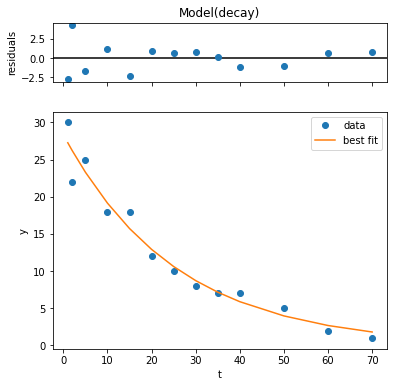

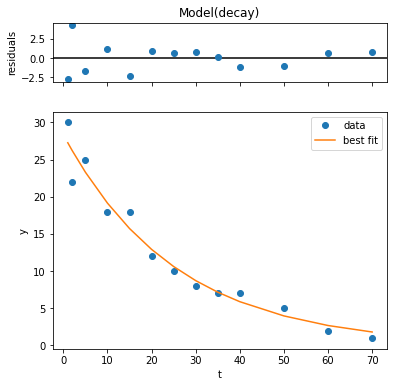

In [258]:
result.plot()